<a href="https://colab.research.google.com/github/GdGato/Fast_IA/blob/339/Accelerate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 4.5 MB/s eta 0:00:00


In [ ]:
from fastai.distributed import *
from fastai.vision.all import *
from fastai.vision.models.xresnet import *

from accelerate import notebook_launcher
from accelerate.utils import write_basic_config

In [ ]:
#from accelerate.utils import write_basic_config
#write_basic_config()

Path('/root/.cache/huggingface/accelerate/default_config.yaml')

In [ ]:
path = untar_data(URLs.PETS)

In [ ]:
# Definición de la función de obtención de etiquetas
def get_y(o):
    # La etiqueta se determina por si la primera letra es mayúscula
    return o[0].isupper()

# Función de entrenamiento del modelo
def train(path):
    # Cargar los datos de imágenes utilizando ImageDataLoaders
    dls = ImageDataLoaders.from_name_func(
        path, get_image_files(path), valid_pct=0.2,
        label_func=get_y, item_tfms=Resize(224))

    # Crear el modelo de aprendizaje utilizando resnet34
    # y métrica de tasa de error
    learn = vision_learner(dls, resnet34, metrics=error_rate).to_fp16()

    # Ajustar finamente (fine-tune) el modelo durante 1 época (epoch)
    learn.fine_tune(1)


In [ ]:
def train(path):
    # Cargar los datos de imágenes utilizando ImageDataLoaders
    dls = ImageDataLoaders.from_name_func(
        path, get_image_files(path), valid_pct=0.2,
        label_func=get_y, item_tfms=Resize(224))

    # Crear el modelo de aprendizaje utilizando resnet34
    # y métrica de tasa de error
    learn = vision_learner(dls, resnet34, metrics=error_rate).to_fp16()

    # Desactivar la sincronización de Batch Normalization (sync_bn) y realizar el ajuste fino (fine-tune)
    # in_notebook=True permite que el entrenamiento se realice en un entorno de cuaderno (notebook)
    with learn.distrib_ctx(sync_bn=False, in_notebook=True):
        learn.fine_tune(1)

    # Exportar el modelo entrenado con el nombre "pets"
    learn.export("pets")


In [ ]:
notebook_launcher(train, (path,), num_processes=2)

Launching training on one GPU.


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 101MB/s]


Training Learner...


epoch,train_loss,valid_loss,error_rate,time
0,0.389914,0.263313,0.118742,01:21


epoch,train_loss,valid_loss,error_rate,time
0,0.237672,0.182886,0.081529,01:19


In [ ]:
imgs = get_image_files(path)
learn = load_learner(path/'pets')
learn.predict(imgs[0])

('True', tensor(1), tensor([0.0065, 0.9935]))

In [ ]:
path = untar_data(URLs.PETS)

In [ ]:
files = get_image_files(path/'pets')
len(files)

0

In [ ]:
files[0],files[6]

(Path('/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_15.jpg'),
 Path('/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_118.jpg'))

In [ ]:
def label_func(f): return f[0].isupper()

In [ ]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))

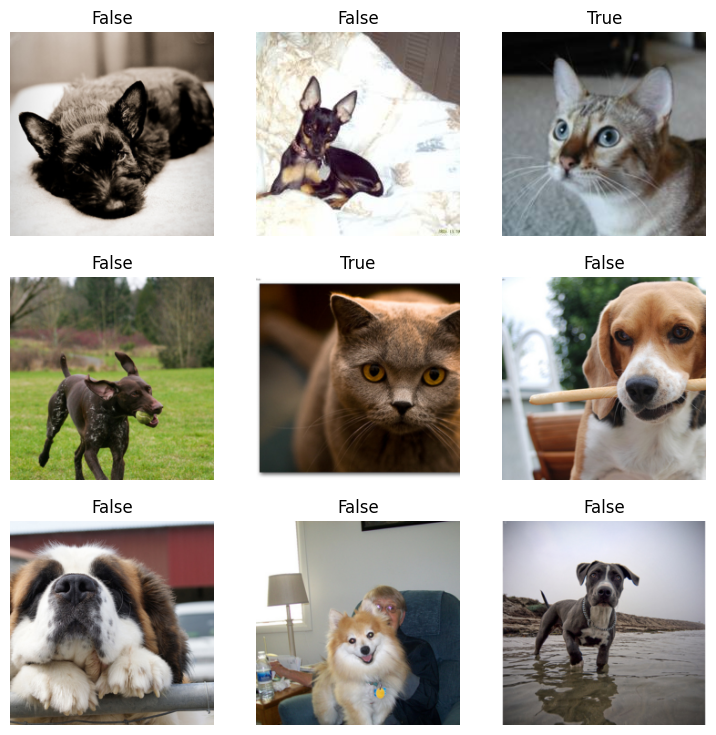

In [ ]:
dls.show_batch()

In [ ]:
learn = load_learner(path/'pets')
learn.fine_tune(1) #Entrenandolo 1 epoca

epoch,train_loss,valid_loss,error_rate,time
0,nan,None,None,00:00


/usr/local/lib/python3.10/dist-packages/fastprogress/fastprogress.py:73: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


epoch,train_loss,valid_loss,error_rate,time
0,nan,None,None,00:00
